In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath(".."))
from pathlib import Path
from scripts.download_weather_data import fetch_nasa_power_weather
from scripts.plant_config import plant_config

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [2]:
# Read plant parameters from config file
data_path = Path("../data")
file_name = "weather_data.csv"
config = plant_config

In [3]:
config

{'latitude': 48.14951,
 'longitude': 11.56999,
 'elevation': 516,
 'capacity_kwp': 3,
 'n_modules': 12,
 'module_area': 1.67,
 'tilt': 30,
 'azimuth': 200}

From the NASA POWER documentation, here are the units for the parameters you asked:
- T2M (Temperature at 2 meters): °C (degrees Celsius)
- RH2M (Relative Humidity at 2 meters): % (percentage)
- WS2M (Wind Speed at 2 meters): m/s (meters per second)
- WD2M (Wind Direction at 2 meters): degrees (meteorological degrees, 0° = North, 90° = East, etc.)
- PS (Surface Pressure): kPa (kilopascals)
- CLOUD_AMT (Total Cloud Amount): % (percentage)

These are the standard units NASA POWER uses for surface meteorological variables.

In [4]:
# Download weather data from NASA POWER API
parameters = ("T2M", "RH2M", "WS2M", "WD2M", "PS", "CLOUD_AMT")
df_weather = fetch_nasa_power_weather(
    latitude=config['latitude'],
    longitude=config['longitude'],
    start="20190101",
    end="20191231",
    parameters=parameters,
    resolution="hourly",
)


Requesting hourly data from: https://power.larc.nasa.gov/api/temporal/hourly/point?parameters=T2M,RH2M,WS2M,WD2M,PS,CLOUD_AMT&community=RE&longitude=11.56999&latitude=48.14951&start=20190101&end=20191231&format=JSON&user=demo&time-standard=UTC


In [5]:
df_weather.head()

,datetime,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
0,2019-01-01 00:00:00+00:00,0.68,98.90,1.38,268.3,95.88,0.5029
1,2019-01-01 01:00:00+00:00,0.64,98.94,1.36,262.4,95.87,0.6432
2,2019-01-01 02:00:00+00:00,0.64,98.91,1.42,254.5,95.84,1.0000
3,2019-01-01 03:00:00+00:00,0.64,98.84,1.45,249.4,95.78,1.0000
4,2019-01-01 04:00:00+00:00,0.50,98.56,1.47,246.4,95.70,1.0000


In [6]:
df_weather.shape

(8760, 7)

In [7]:
# Save the weather data to a CSV file
df_weather.to_csv(data_path / file_name, index=False)

### Read downloaded file

In [8]:
# Read CSV file for data exploration
df_weather = pd.read_csv(data_path / file_name, parse_dates=["datetime"])

In [9]:
df_weather.head()

,datetime,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
0,2019-01-01 00:00:00+00:00,0.68,98.90,1.38,268.3,95.88,0.5029
1,2019-01-01 01:00:00+00:00,0.64,98.94,1.36,262.4,95.87,0.6432
2,2019-01-01 02:00:00+00:00,0.64,98.91,1.42,254.5,95.84,1.0000
3,2019-01-01 03:00:00+00:00,0.64,98.84,1.45,249.4,95.78,1.0000
4,2019-01-01 04:00:00+00:00,0.50,98.56,1.47,246.4,95.70,1.0000


In [10]:
# Statistics of the weather data
df_weather.describe()


,temperature,humidity,wind_speed,wind_direction,mean_sea_level_pressure,cloudiness
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,9.110526,82.980686,1.197398,196.553961,94.403898,0.700157
std,8.522017,15.556364,0.712003,91.295082,0.844200,0.354707
min,-11.940000,28.170000,0.020000,0.000000,91.100000,0.000000
25%,2.390000,72.607500,0.730000,108.675000,93.930000,0.418100
50%,8.530000,88.435000,1.010000,224.500000,94.470000,0.896150
75%,15.750000,96.000000,1.490000,267.100000,94.900000,0.992200
max,35.440000,100.000000,5.450000,359.500000,96.570000,1.000000


In [11]:
# Check for missing values
df_weather.isnull().sum()

datetime                   0
temperature                0
humidity                   0
wind_speed                 0
wind_direction             0
mean_sea_level_pressure    0
cloudiness                 0
dtype: int64

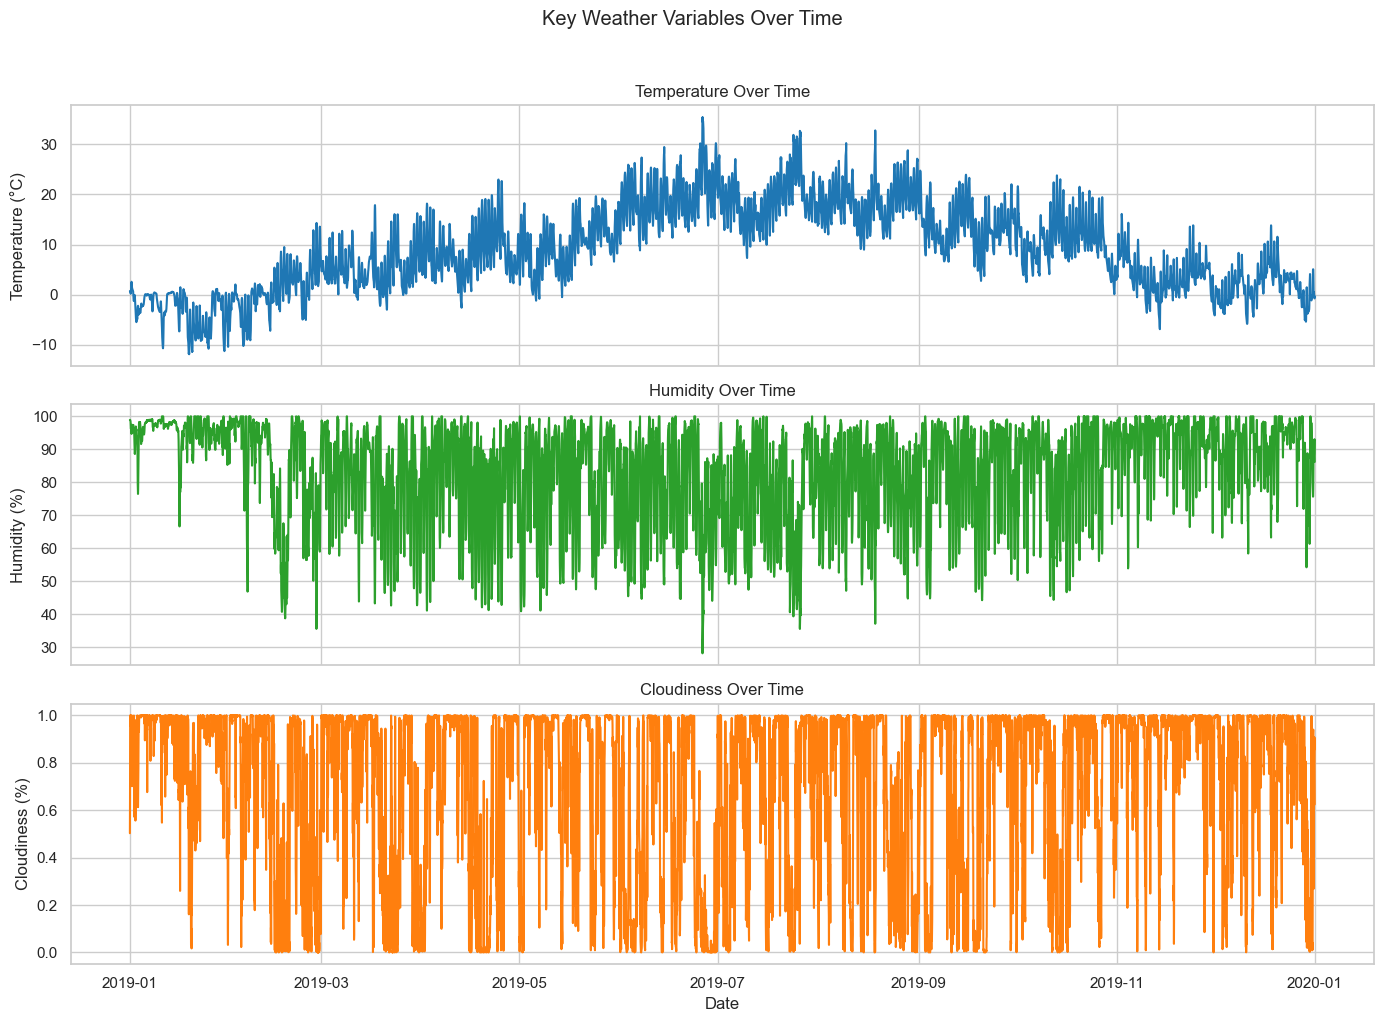

In [16]:
# Set up the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot Temperature
if "temperature" in df_weather.columns:
    axs[0].plot(df_weather["datetime"], df_weather["temperature"], color="tab:blue")
    axs[0].set_ylabel('Temperature (°C)')
    axs[0].set_title('Temperature Over Time')

# Plot Humidity
if "humidity" in df_weather.columns:
    axs[1].plot(df_weather["datetime"], df_weather["humidity"], color="tab:green")
    axs[1].set_ylabel('Humidity (%)')
    axs[1].set_title('Humidity Over Time')

# Plot Cloudiness
if "cloudiness" in df_weather.columns:
    axs[2].plot(df_weather["datetime"], df_weather["cloudiness"], color="tab:orange")
    axs[2].set_ylabel('Cloudiness (%)')
    axs[2].set_title('Cloudiness Over Time')
    axs[2].set_xlabel('Date')

# Make the layout cleaner
for ax in axs:
    ax.grid(True)
    ax.label_outer()  # Only show outer labels

plt.suptitle("Key Weather Variables Over Time", y=1.02)
plt.tight_layout()
plt.show()

To explore the key weather inputs affecting PV generation, a time series plot was created showing temperature, humidity, and cloudiness over the data collection period (Figure X). Temperature and humidity are displayed on the primary y-axis, while cloudiness is shown on a secondary y-axis to account for differences in scale. The weather patterns exhibit clear daily and seasonal variability, with cloudiness demonstrating more abrupt changes compared to the smoother trends of temperature and humidity. This variability directly impacts the photovoltaic power output and highlights the need for a probabilistic forecasting approach that can adapt to changing atmospheric conditions.

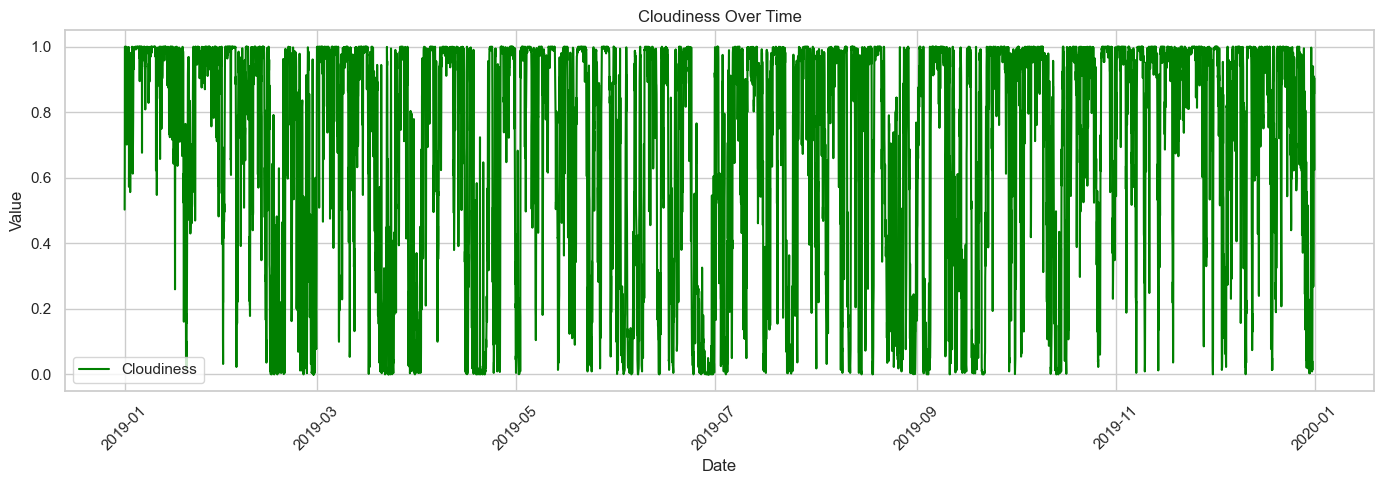

In [17]:
# Time series plot of temperature, humidity, and cloudiness (if available)
plt.figure(figsize=(14, 5))
plt.plot(df_weather["datetime"], df_weather["cloudiness"], label=col.capitalize(), color='green')
plt.legend()
plt.title("Cloudiness Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

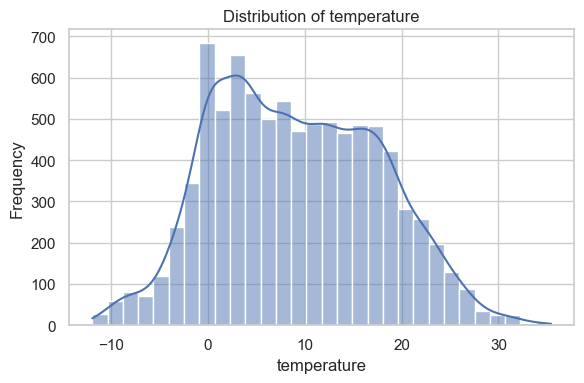

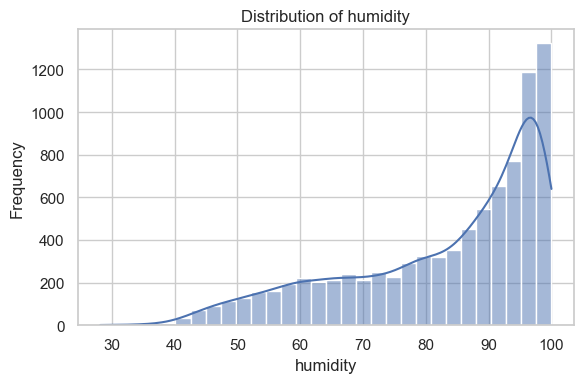

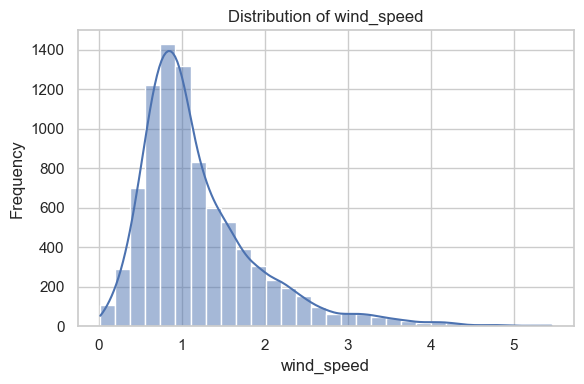

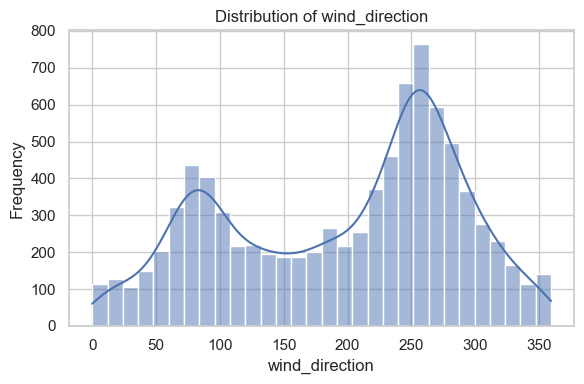

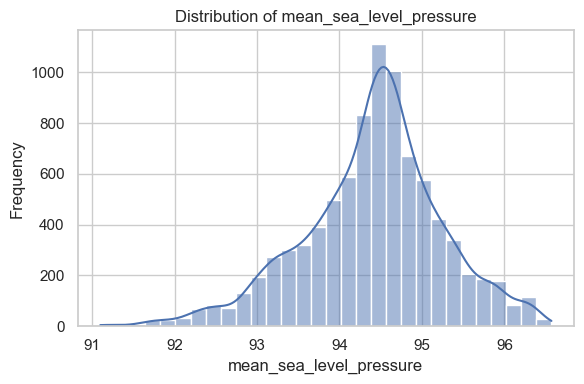

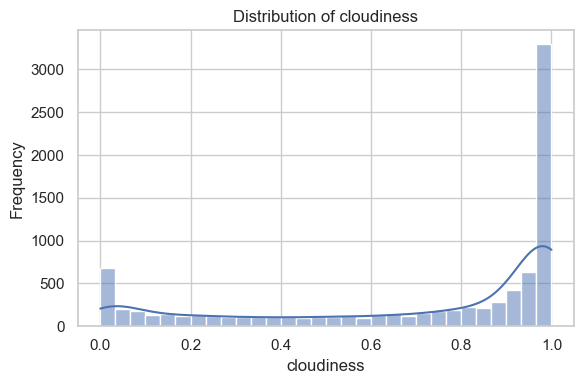

In [18]:
# Distribution plots for all numeric features
numeric_cols = df_weather.select_dtypes(include=["number"]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_weather[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

To better understand the characteristics of the weather variables used as inputs for the photovoltaic forecasting model, distribution plots were generated for each numeric feature. As shown in the figures,, temperature presents a roughly normal distribution centered around moderate values, consistent with seasonal variations at the measurement location. Relative humidity shows a unimodal distribution, concentrated toward moderate to high values, with a slight left skewness indicating occasional occurrences of dry conditions. Cloudiness displays a left-skewed distribution, with a majority of observations concentrated at high cloudiness values (80–100%), indicating that overcast conditions are frequent. Wind speed is right-skewed, as most days experience low to moderate winds with a few high-speed events extending the distribution tail. Wind direction displays a non-uniform distribution with preferred prevailing directions, but without distinct bimodality. Peaks around specific angles suggest dominant wind patterns rather than a random or purely bimodal behavior. Surface pressure shows a narrow, approximately normal distribution, typical of stable atmospheric conditions. These insights into the distribution of key variables inform model calibration and highlight the importance of probabilistic approaches to capture variability in solar generation forecasting.



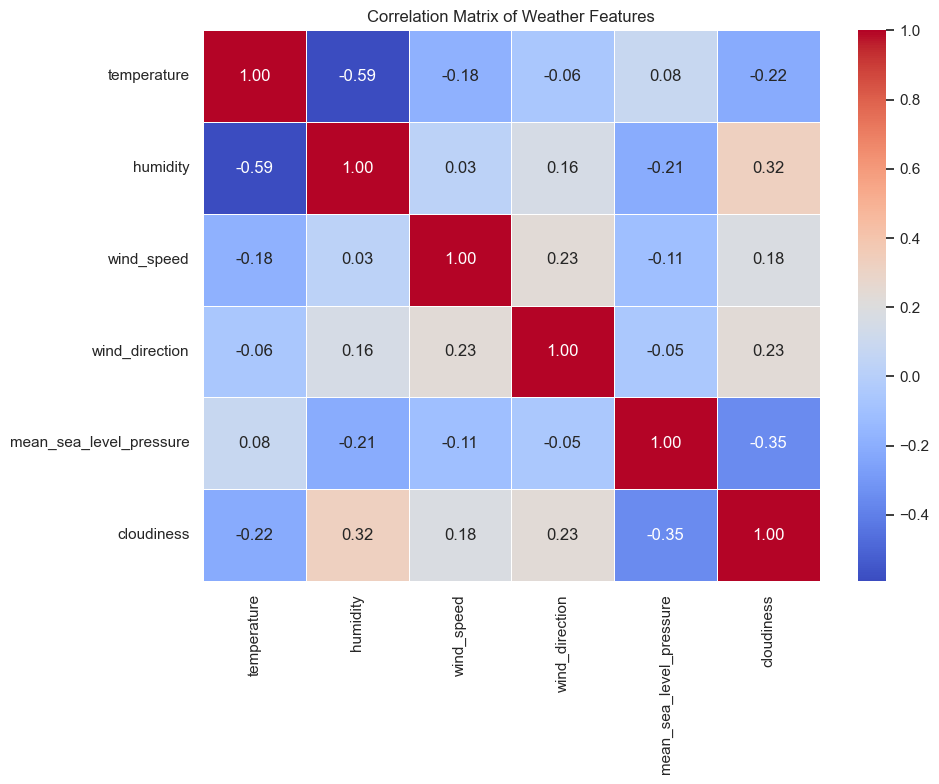

In [15]:
# Correlation matrix and heatmap (if >1 numeric columns)
if len(numeric_cols) > 1:
    corr_matrix = df_weather[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Weather Features")
    plt.tight_layout()
    plt.show()

The correlation matrix reveals that temperature and humidity are moderately negatively correlated, as expected due to their inverse physical relationship. Cloudiness shows a weak positive correlation with humidity and a slight negative correlation with temperature, reflecting typical weather patterns. Wind speed, wind direction, and surface pressure exhibit very low correlations with other variables, suggesting they provide largely independent information for forecasting models. Overall, the low-to-moderate correlation strengths emphasize the need for multi-feature approaches in modeling photovoltaic generation.

### Temporal Analysis
Hourly × Monthly heatmaps for temperature, humidity, and cloudiness reveal daily and seasonal trends.

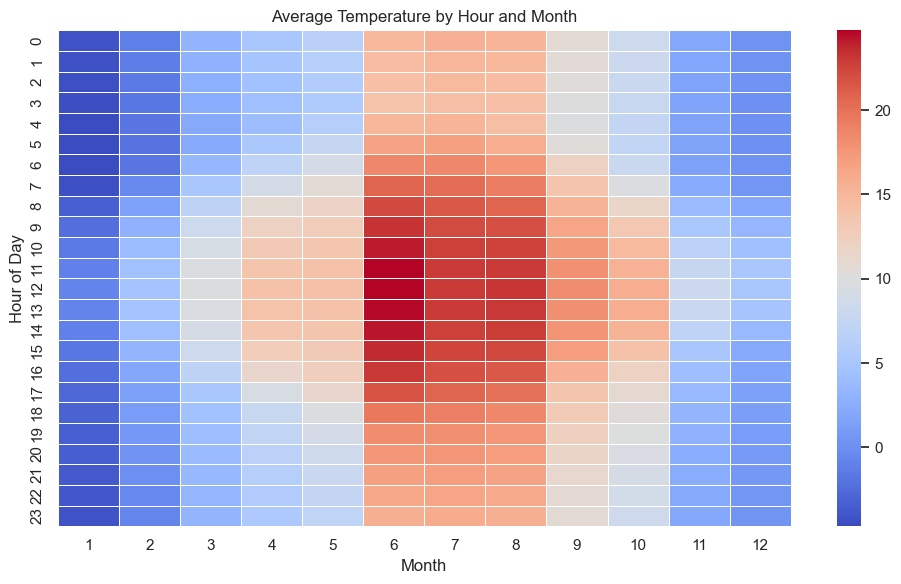

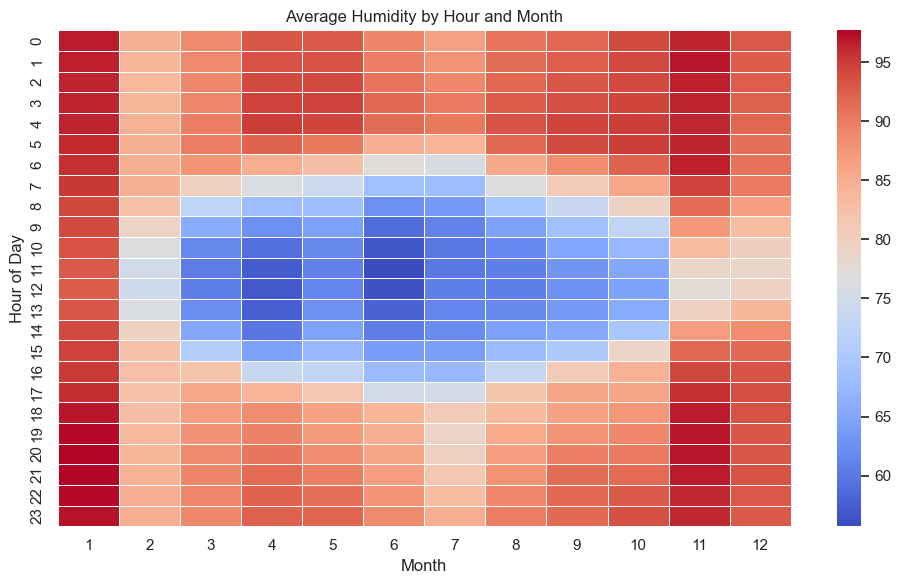

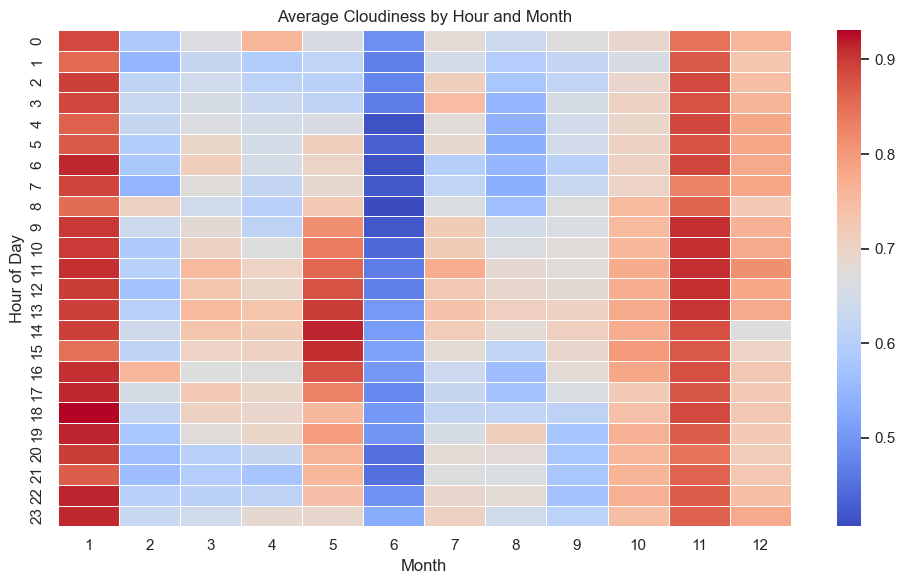

In [16]:
# Extract hour and month from datetime
df_weather["hour"] = df_weather["datetime"].dt.hour
df_weather["month"] = df_weather["datetime"].dt.month

# Generate heatmaps for features by hour and month
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        pivot = df_weather.pivot_table(index="hour", columns="month", values=col, aggfunc="mean")
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot, cmap="coolwarm", annot=False, linewidths=0.5)
        plt.title(f"Average {col.capitalize()} by Hour and Month")
        plt.xlabel("Month")
        plt.ylabel("Hour of Day")
        plt.tight_layout()
        plt.show()

#### Rolling Averages:
Smooths out noise in raw sensor data using a 6-hour rolling average.

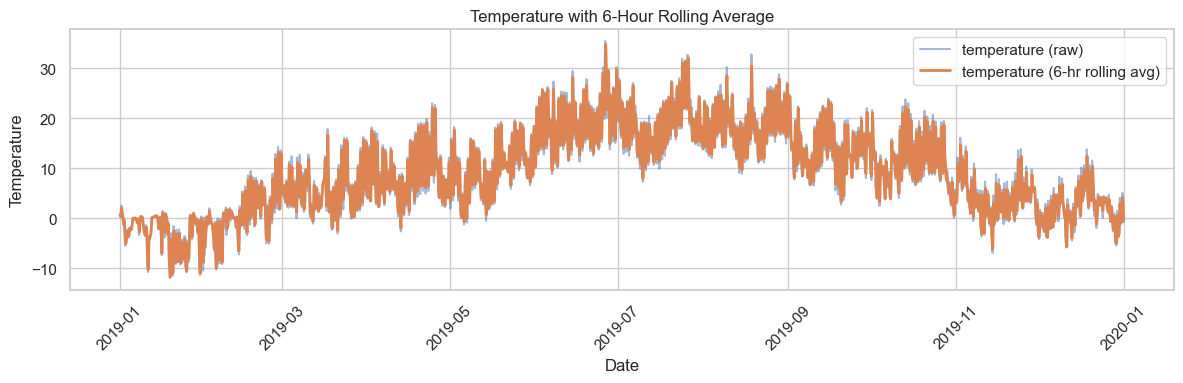

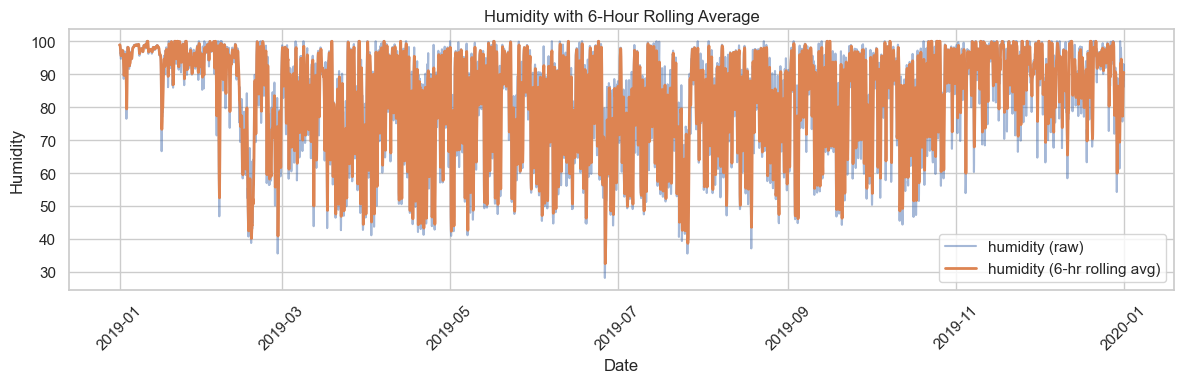

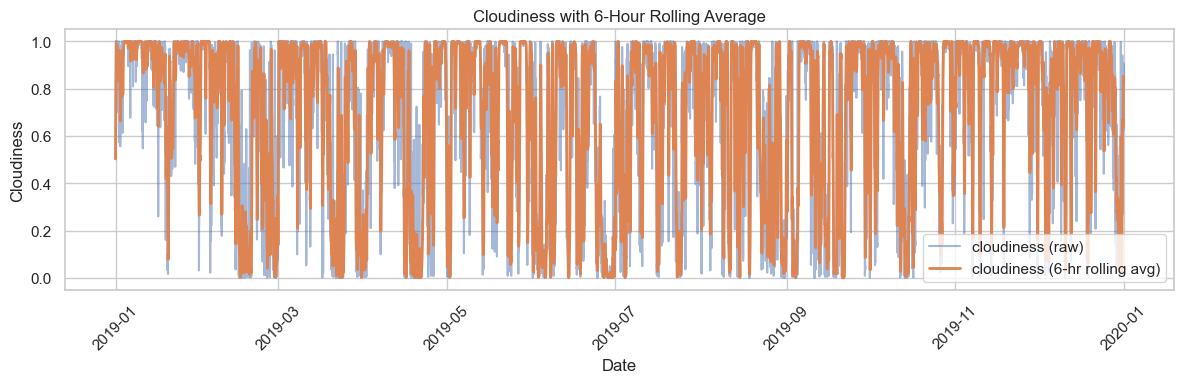

In [17]:
# Compute rolling averages for select features
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        df_weather[f"{col}_rolling"] = df_weather[col].rolling(window=6, min_periods=1).mean()

# Plot raw vs rolling average
for col in ["temperature", "humidity", "cloudiness"]:
    if f"{col}_rolling" in df_weather.columns:
        plt.figure(figsize=(12, 4))
        plt.plot(df_weather["datetime"], df_weather[col], label=f"{col} (raw)", alpha=0.5)
        plt.plot(df_weather["datetime"], df_weather[f"{col}_rolling"], label=f"{col} (6-hr rolling avg)", linewidth=2)
        plt.title(f"{col.capitalize()} with 6-Hour Rolling Average")
        plt.xlabel("Date")
        plt.ylabel(col.capitalize())
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

#### Outlier Detection:
Detected using the IQR method for each numeric feature. Helps identify sensor errors, extreme weather events, or unusual patterns that might skew model training.


In [18]:
# Identify numeric columns
numeric_cols = df_weather.select_dtypes(include=["number"]).columns

# Detect and store outliers using IQR
outliers = {}
for col in numeric_cols:
    Q1 = df_weather[col].quantile(0.25)
    Q3 = df_weather[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = (df_weather[col] < (Q1 - 1.5 * IQR)) | (df_weather[col] > (Q3 + 1.5 * IQR))
    outliers[col] = df_weather.loc[mask, ["datetime", col]]

# Display outliers
for name, df_outlier in outliers.items():
    if not df_outlier.empty:
        print(f"\nOutliers in {name}:")
        print(df_outlier.head())


Outliers in humidity:
                      datetime  humidity
1379 2019-02-27 11:00:00+00:00     35.58
1380 2019-02-27 12:00:00+00:00     36.77
4231 2019-06-26 07:00:00+00:00     35.57
4232 2019-06-26 08:00:00+00:00     30.35
4233 2019-06-26 09:00:00+00:00     28.17

Outliers in wind_speed:
                    datetime  wind_speed
16 2019-01-01 16:00:00+00:00        3.09
17 2019-01-01 17:00:00+00:00        3.39
18 2019-01-01 18:00:00+00:00        3.50
19 2019-01-01 19:00:00+00:00        3.57
20 2019-01-01 20:00:00+00:00        3.58

Outliers in mean_sea_level_pressure:
                     datetime  mean_sea_level_pressure
537 2019-01-23 09:00:00+00:00                    92.45
538 2019-01-23 10:00:00+00:00                    92.39
539 2019-01-23 11:00:00+00:00                    92.33
540 2019-01-23 12:00:00+00:00                    92.28
541 2019-01-23 13:00:00+00:00                    92.28

Outliers in humidity_rolling:
                      datetime  humidity_rolling
1149 2019-02

#### Seasonal Analysis

In [19]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"

df_weather["month"] = df_weather["datetime"].dt.month
df_weather["season"] = df_weather["month"].apply(get_season)

Boxplots help identify how wide and skewed feature distributions are per season.

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_83908/3141912092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")


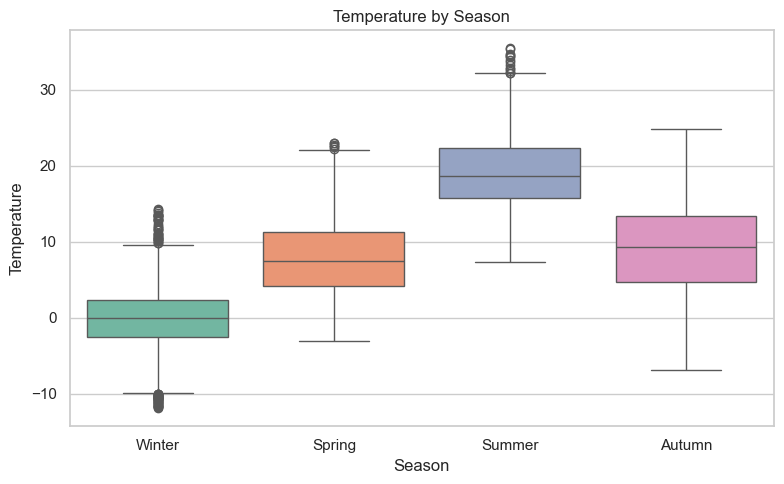

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_83908/3141912092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")


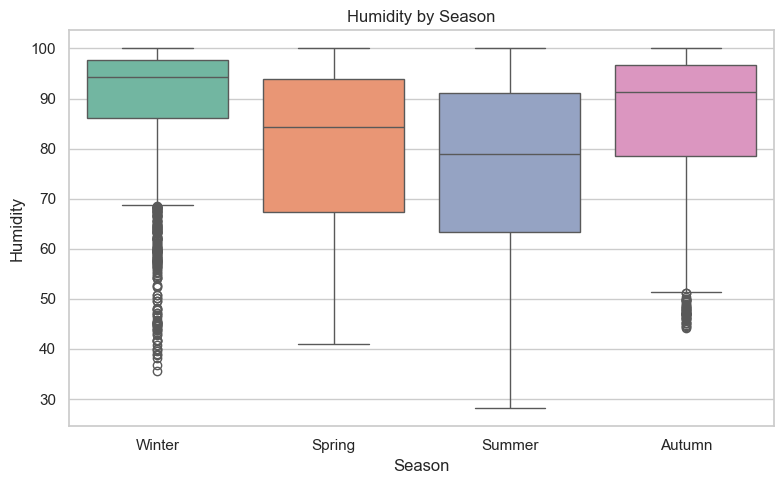

/var/folders/wn/5hltvcvs3qg_bl9q2vw70c9r0000gn/T/ipykernel_83908/3141912092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")


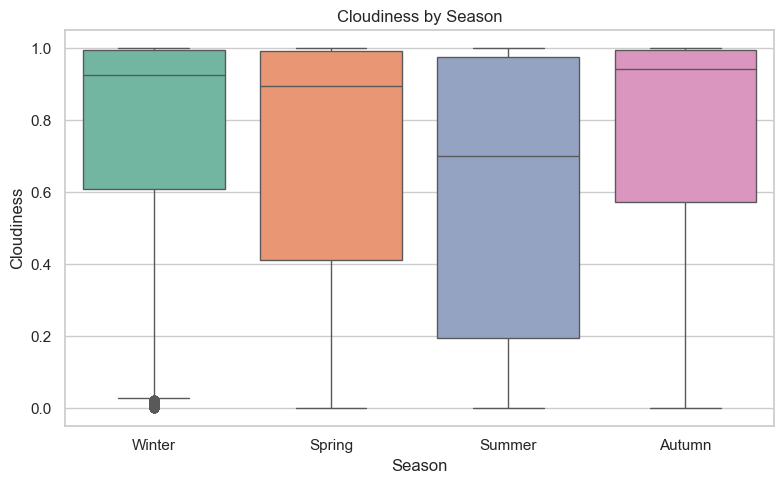

In [20]:
# Seasonal boxplots
seasonal_cols = ["temperature", "humidity", "cloudiness"]
for col in seasonal_cols:
    if col in df_weather.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df_weather, x="season", y=col, palette="Set2")
        plt.title(f"{col.capitalize()} by Season")
        plt.ylabel(col.capitalize())
        plt.xlabel("Season")
        plt.tight_layout()
        plt.show()

- Temperature: Highest median and upper quartile in Summer. Coldest temperatures with wider range in Winter, Outliers observed in both extremes (cold snaps, heat spikes)
- Humidity: Winter shows highest average and narrower range (more humid air). Summer has lower humidity but wider spread
- Cloudiness: Winter and Autumn tend to have higher cloudiness. Summer generally clearer but with greater variability

#### Seasonal Average Heatmap by Hour
Heatmaps show time-of-day effects for each season.

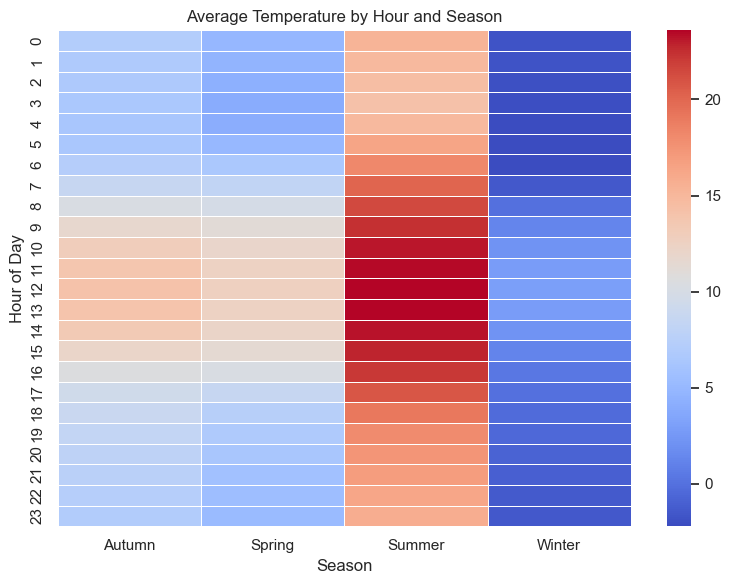

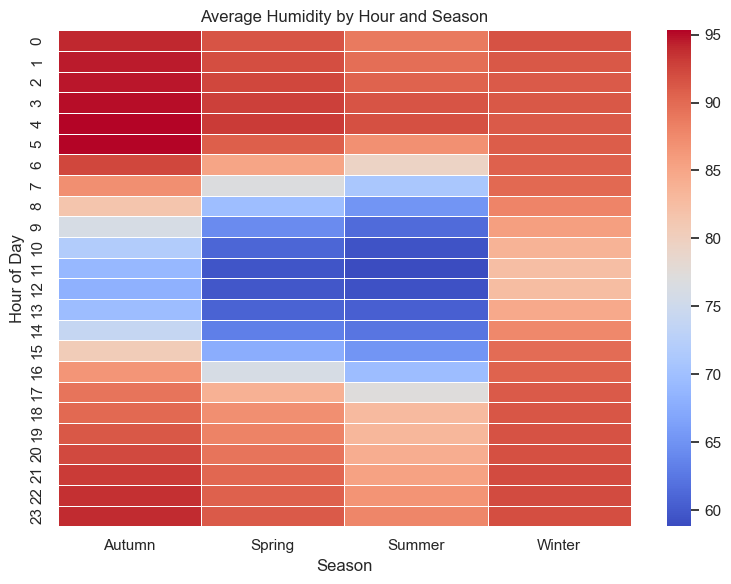

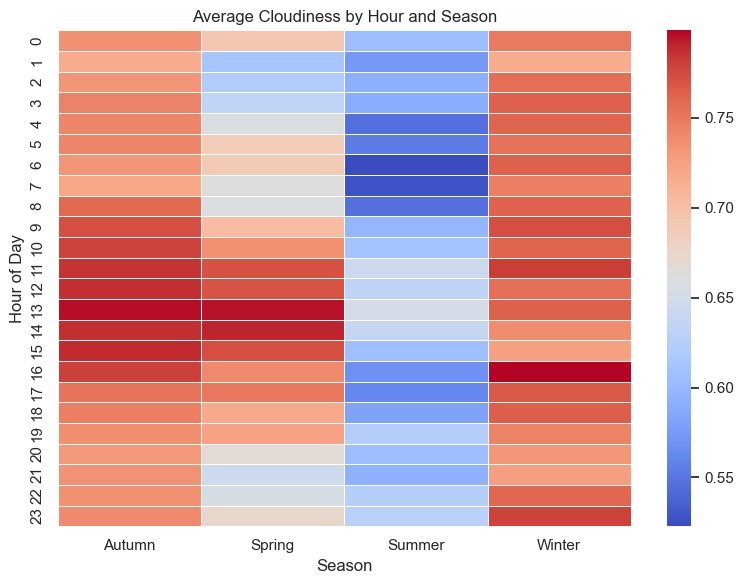

In [21]:
df_weather["hour"] = df_weather["datetime"].dt.hour
for col in ["temperature", "humidity", "cloudiness"]:
    if col in df_weather.columns:
        pivot = df_weather.pivot_table(index="hour", columns="season", values=col, aggfunc="mean")
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot, cmap="coolwarm", annot=False, linewidths=0.5)
        plt.title(f"Average {col.capitalize()} by Hour and Season")
        plt.xlabel("Season")
        plt.ylabel("Hour of Day")
        plt.tight_layout()
        plt.show()

- Temperature: From the data, temperatures peak around 14:00–16:00 and Coldest around 05:00–07:00. Daily temperature amplitude is largest in Summer
- Humidity: Based on the dataframe, humidity is consistently higher in early morning hour and Drops significantly by midday, particularly in Summer.
- Cloudiness: From the dataframe, cloudiness is more uniform throughout the day, though slightly higher in morning and late afternoon. Autumn and Winter show consistently higher average cloud cover.